In [ ]:
import os
cpuCount = os.cpu_count()
os.environ["OMP_NUM_THREADS"] = "cpuCount-4"
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import tensorflow as tf
from tensorflow import keras


import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# cifar10
from tensorflow.keras import datasets, layers, models


In [3]:
print(tf.__version__)

2.9.1


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
# Load the image
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
def create_model():
  # Initialize the ResNet50 model, without fully-connected layers
  model = ResNet50(include_top=False , weights='imagenet', input_shape=(32, 32, 3), pooling='max')

  model.trainable = False

  inputs = keras.Input(shape=(32, 32, 3))

  x = model(inputs, training=False)
  # Convert features of shape `base_model.output_shape[1:]` to vectors
  x = keras.layers.Flatten()(x)


  x = keras.layers.Dense(1024)(x)
  x = keras.layers.Dense(128)(x)
  # A Dense classifier with a single unit (binary classification)
  outputs = keras.layers.Dense(10)(x)
  model = keras.Model(inputs, outputs)  

  return model


In [7]:
model = create_model()
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

batch_size = 1024
steps_per_epoch = 50000 // batch_size
validation_steps = 10000 // batch_size

history = model.fit(train_images, train_labels, epochs=1000, steps_per_epoch=steps_per_epoch, 
                    validation_data=(test_images, test_labels), validation_steps=validation_steps, verbose=0)

94765736/94765736 [==============================] - 4s 0us/step


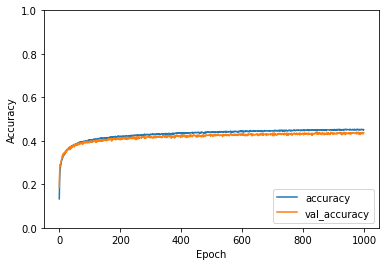

313/313 - 9s - loss: 1.6010 - accuracy: 0.4375 - 9s/epoch - 27ms/step


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

##  2   Save model

### 2.1 h5 file

In [ ]:
model.save('./saved_model/ResNet_TransferLearning/HDF5/ResNet_TransferLearning.h5')